# Read Data; EDA (Histograms, Boxplots, Heatmap)

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df=pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


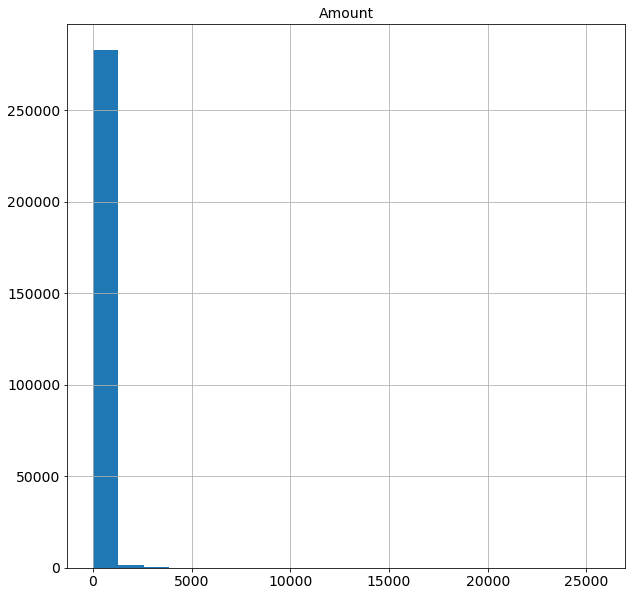

In [30]:
# Histogram of Amount Feature

df['Amount'].hist(bins=20,figsize=(10,10))
plt.title('Amount', fontsize=14)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.show()

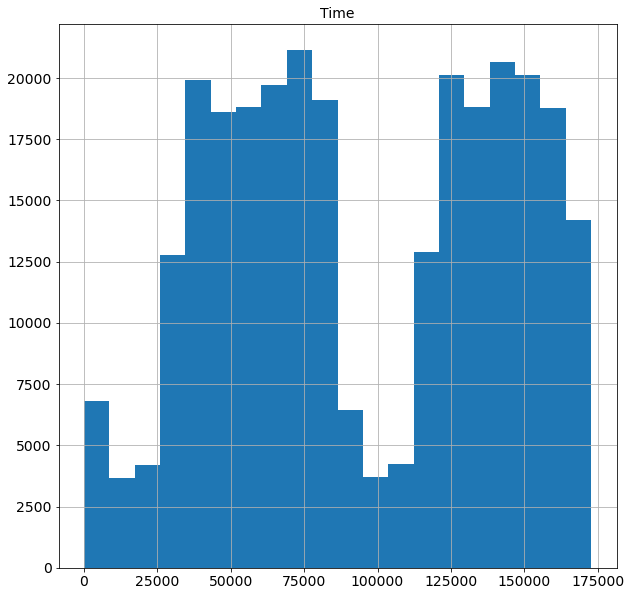

In [31]:
# Histogram of Time Feature

df['Time'].hist(bins=20,figsize=(10,10))
plt.title('Time', fontsize=14)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.show()

In [32]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


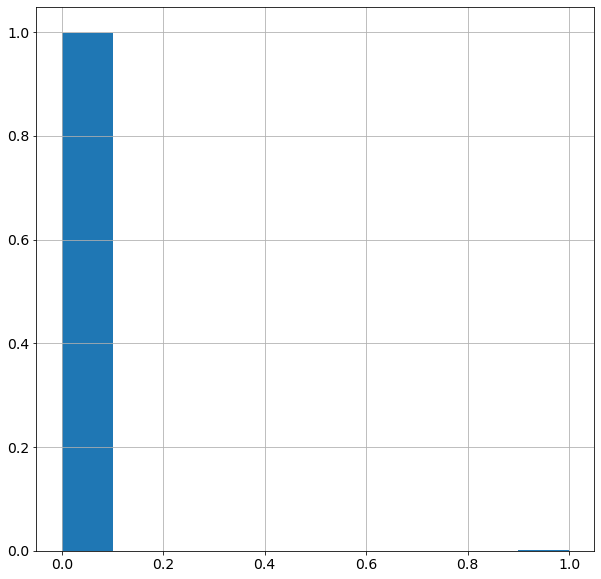

In [33]:
# Histogram of class
df['Class'].hist(weights=np.ones(len(df['Class'])) / len(df['Class']),figsize=[10,10])

In [34]:
df = df.sample(frac=1)

# sample 492 cases from non-fraud samples
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(492)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
df_new = normal_distributed_df.sample(frac=1, random_state=42)

df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36003,38356.0,1.156498,0.304485,0.585672,1.143009,-0.329190,-0.606758,0.069051,-0.091662,-0.022775,...,0.002355,0.072268,0.041162,0.390985,0.434897,-0.430638,0.040604,0.027125,9.60,0
189701,128519.0,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,93.35,1
164621,116867.0,1.899497,0.454719,-0.511258,3.945001,0.251367,-0.054091,0.117736,-0.081500,-0.621610,...,0.081318,0.420267,0.088989,-0.019421,0.114179,0.100510,-0.024041,-0.051174,7.58,0
43204,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76609,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1
156988,109297.0,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,...,0.284841,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,0.00,1
163916,116317.0,-2.784779,3.143642,-1.355247,-0.714815,0.158360,-1.546713,1.043958,-0.974293,2.266959,...,0.348357,0.974024,-0.035395,0.287849,-0.299051,-0.360651,-1.216844,0.327557,1.15,0
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1


# Heatmap

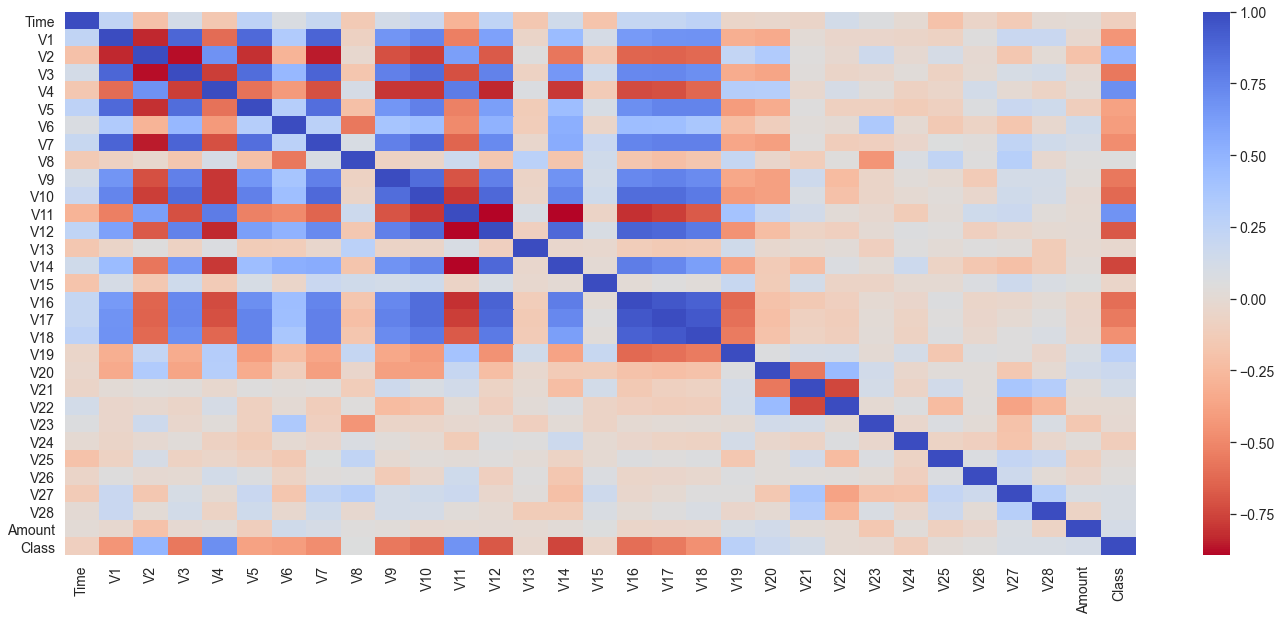

In [87]:
f, ax = plt.subplots(figsize=(24,10))

corr = df_new.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
# ax.set_title('Heatmap', fontsize=28)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.show()

# Box Plots

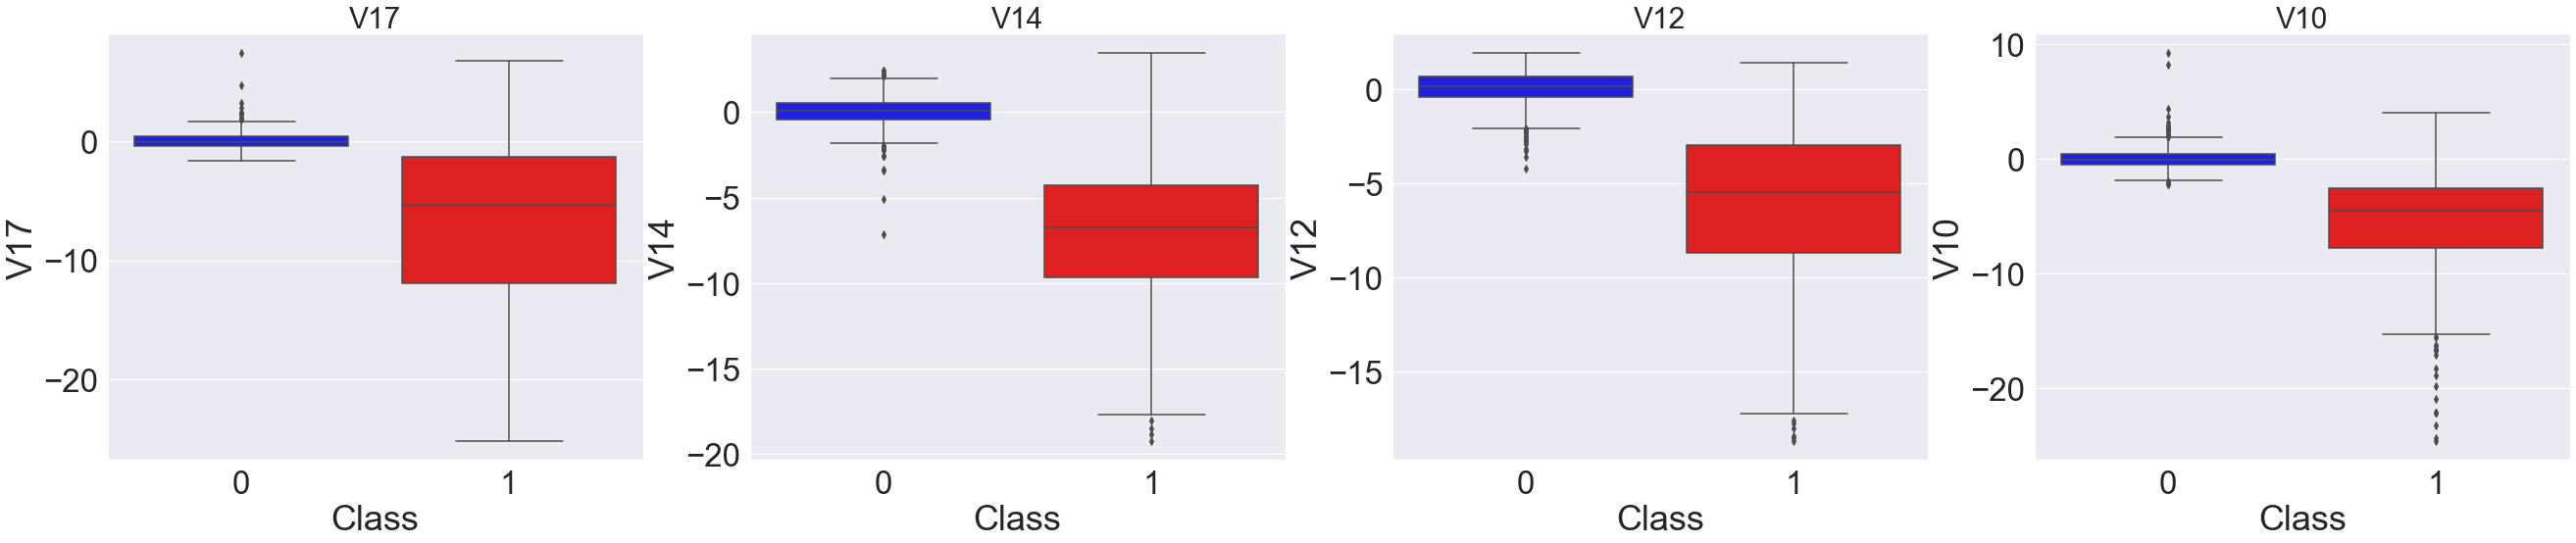

In [76]:
# negative correlated features
f, axes = plt.subplots(ncols=4, figsize=(45,8))

colors = ["blue", "red"]

sns.boxplot(x="Class", y="V17", data=df_new, palette=colors,ax=axes[0])
axes[0].set_title('V17',fontsize=30)

sns.boxplot(x="Class", y="V14", data=df_new, palette=colors, ax=axes[1])
axes[1].set_title('V14',fontsize=30)


sns.boxplot(x="Class", y="V12", data=df_new, palette=colors, ax=axes[2])
axes[2].set_title('V12',fontsize=30)


sns.boxplot(x="Class", y="V10", data=df_new, palette=colors, ax=axes[3])
axes[3].set_title('V10',fontsize=30)
# plt.title('', fontsize=14)
sns.set(font_scale = 3)

a.set_xlabel("X Label",fontsize=30)
a.set_ylabel("Y Label",fontsize=30)
# matplotlib.rc('xtick', labelsize=28) 
# matplotlib.rc('ytick', labelsize=28) 
plt.show()

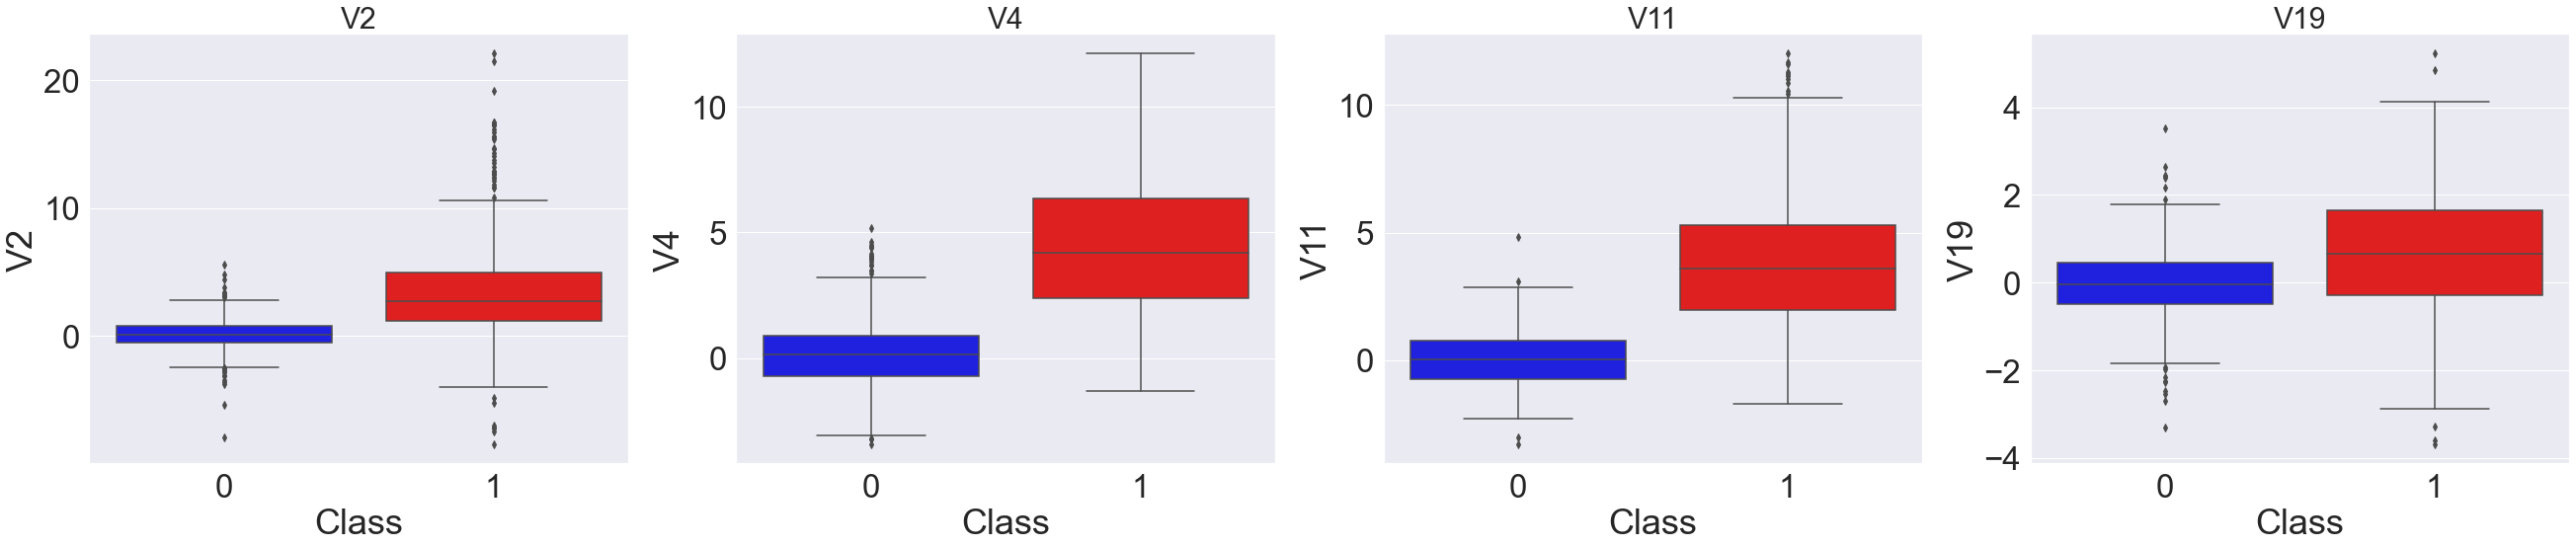

In [77]:
# negative correlated features
f, axes = plt.subplots(ncols=4, figsize=(45,8))

colors = ["blue", "red"]

sns.boxplot(x="Class", y="V2", data=df_new, palette=colors,ax=axes[0])
axes[0].set_title('V2',fontsize=30)

sns.boxplot(x="Class", y="V4", data=df_new, palette=colors, ax=axes[1])
axes[1].set_title('V4',fontsize=30)


sns.boxplot(x="Class", y="V11", data=df_new, palette=colors, ax=axes[2])
axes[2].set_title('V11',fontsize=30)


sns.boxplot(x="Class", y="V19", data=df_new, palette=colors, ax=axes[3])
axes[3].set_title('V19',fontsize=30)
# plt.title('', fontsize=14)
sns.set(font_scale = 3)

a.set_xlabel("X Label",fontsize=30)
a.set_ylabel("Y Label",fontsize=30)
# matplotlib.rc('xtick', labelsize=28) 
# matplotlib.rc('ytick', labelsize=28) 
plt.show()